# intro

## Autores

Juan Pablo Jaramillo Tobon CC 1216727112

Daniel Alejandro Higuita Usuga CC 1152706601


## Dataset

Los registros de viajes en taxi amarillo y verde incluyen campos que capturan fechas/horas de recogida y devolución, lugares de recogida y devolución, distancias de viaje, tarifas detalladas, tipos de tarifas, tipos de pago y recuentos de pasajeros informados por el conductor. Los datos utilizados en los conjuntos de datos adjuntos se recopilaron y proporcionaron a la Comisión de Taxis y Limusinas de Nueva York (TLC).

El dataset posee 19 columnas de las cuales usaremos solo 4

* tpep_pickup_datetime: fecha y hora de inicio de carrera
* pickup_longitude: longitud geoespacial de recogida de la carrera
* pickup_latitude: latitud geoespacial de recogida de la carrera
* tip_amount: propina dejada

## Objetivo

El objetivo es la creacion de un modelo que permita la prediccion de la propina dejada por los usuarios dependiendo de el lugar y la hora donde se recoge la propina

# Dependencias

In [110]:
# Carga de env variables 
# ==============================================================================
import yaml
with open('config.yaml') as f:
    env_vars = yaml.safe_load(f)

In [111]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Librerias

In [136]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib
import os


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math


# Preparación de datos
# ==============================================================================
from sklearn.neighbors import LocalOutlierFactor

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
#from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve


#Creación de modelo
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


#configuracion de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [113]:
from funciones import *

## Datasets

In [114]:
csv2015_1 = pd.read_csv('data/yellow_tripdata_2015-01.csv',nrows=10000)
csv2015_2 = pd.read_csv('data/yellow_tripdata_2015-02.csv',nrows=10000)
csv2015_3 = pd.read_csv('data/yellow_tripdata_2015-03.csv',nrows=10000)

df = pd.concat([csv2015_1,csv2015_2,csv2015_3],ignore_index=True)

## Preparacion de Datos

### Eliminación de Columnas innecesarias

In [115]:
df = df[["tpep_pickup_datetime","pickup_longitude","pickup_latitude","tip_amount"]]

### Minimización del Dataset

In [116]:
# if env_vars['minimize_dataset']:
#     particion = (100-0.1)/100
#     X_train, X_test, y_train, y_test = train_test_split(df['reseña'],df['clasificacion'], test_size=particion, random_state=42)
#     df = pd.concat([y_train, X_train], axis=1)
#     del X_train, X_test, y_train, y_test 

### Revisión de Duplicados

In [117]:
df.loc[df.duplicated()]

,tpep_pickup_datetime,pickup_longitude,pickup_latitude,tip_amount
3831,2015-01-17 22:40:27,-74.002357,40.739826,0.0
10067,2015-02-09 04:13:10,-74.006393,40.743942,0.0
10394,2015-02-15 17:14:11,0.000000,0.000000,0.0
10747,2015-02-03 13:03:23,-73.995377,40.717339,0.0
18035,2015-02-08 03:13:37,0.000000,0.000000,0.0
21719,2015-03-03 18:29:47,-73.985092,40.761169,0.0
22127,2015-03-07 04:08:56,-73.944832,40.783001,0.0
24430,2015-03-09 10:23:35,-73.988617,40.754028,0.0
24589,2015-03-27 10:07:25,0.000000,0.000000,0.0
24912,2015-03-01 12:38:12,0.000000,0.000000,0.0


### Eliminación de Duplicados

In [118]:
df = df.drop_duplicates()

### Información del Dataset

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29990 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tpep_pickup_datetime  29990 non-null  object 
 1   pickup_longitude      29990 non-null  float64
 2   pickup_latitude       29990 non-null  float64
 3   tip_amount            29990 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.1+ MB


In [120]:
df.describe()

,pickup_longitude,pickup_latitude,tip_amount
count,29990.000000,29990.000000,29990.000000
mean,-72.682211,40.038902,1.622341
std,9.692669,5.339494,2.325093
min,-74.412666,0.000000,-0.700000
25%,-73.991844,40.735176,0.000000
50%,-73.981644,40.752693,1.060000
75%,-73.966860,40.767288,2.160000
max,0.000000,40.982090,50.000000


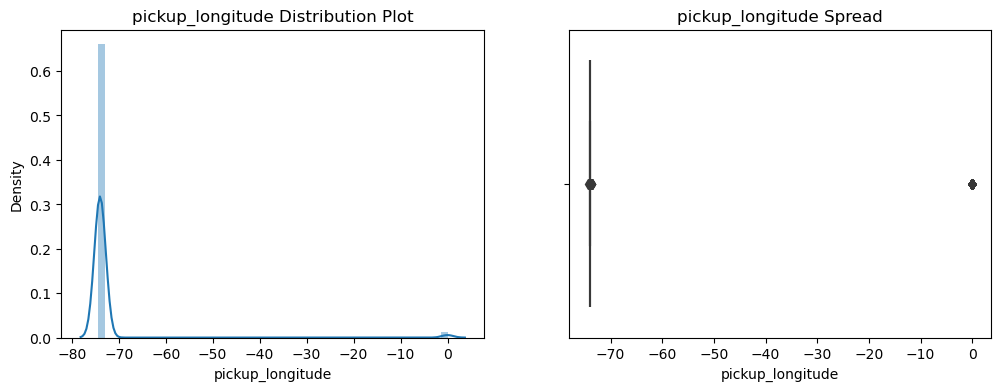

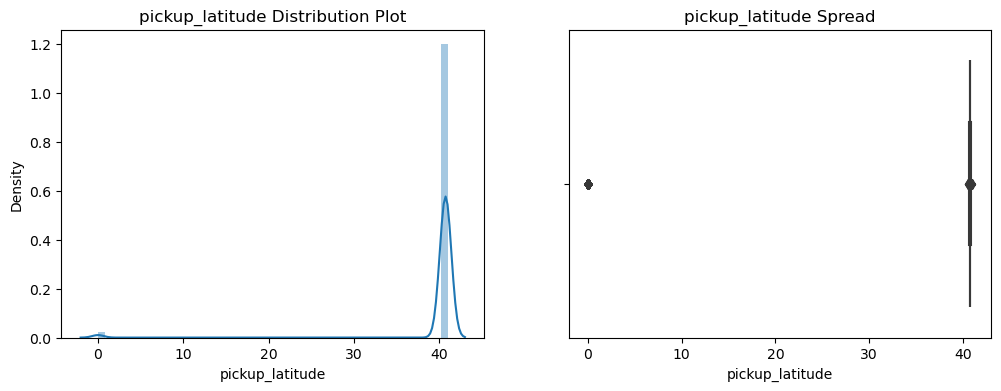

In [121]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('pickup_longitude Distribution Plot')
sns.distplot(df.pickup_longitude)

plt.subplot(1,2,2)
plt.title('pickup_longitude Spread')
sns.boxplot(x=df.pickup_longitude, palette='nipy_spectral')

plt.show()

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('pickup_latitude Distribution Plot')
sns.distplot(df.pickup_latitude)

plt.subplot(1,2,2)
plt.title('pickup_latitude Spread')
sns.boxplot(x=df.pickup_latitude, palette='nipy_spectral')

plt.show()

In [122]:
df = df[df["pickup_longitude"] != 0]
df = df[df["tip_amount"] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17747 entries, 0 to 29997
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tpep_pickup_datetime  17747 non-null  object 
 1   pickup_longitude      17747 non-null  float64
 2   pickup_latitude       17747 non-null  float64
 3   tip_amount            17747 non-null  float64
dtypes: float64(3), object(1)
memory usage: 693.2+ KB


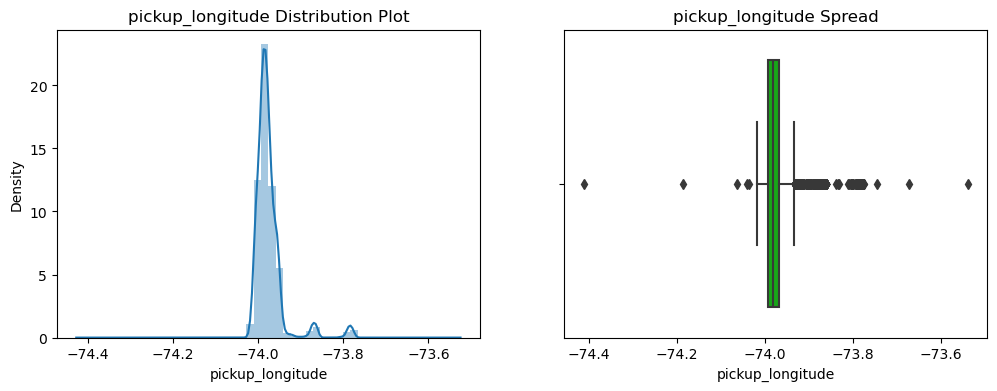

<Axes: title={'center': 'pickup_latitude Spread'}, xlabel='pickup_latitude'>

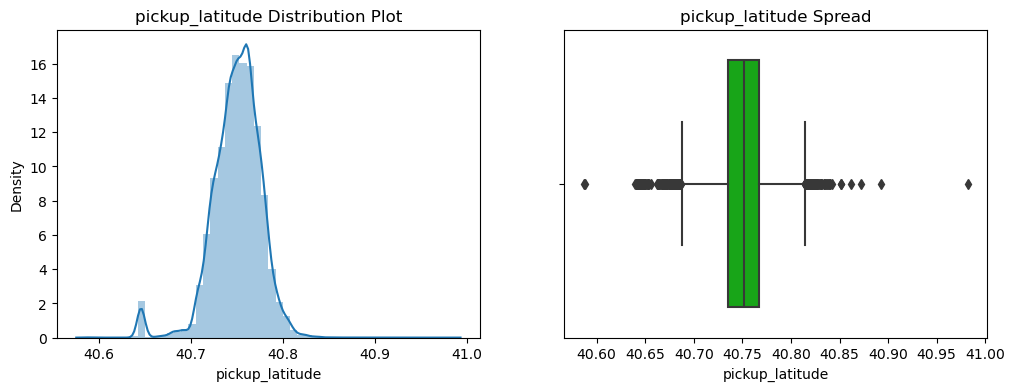

In [123]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('pickup_longitude Distribution Plot')
sns.distplot(df.pickup_longitude)

plt.subplot(1,2,2)
plt.title('pickup_longitude Spread')
sns.boxplot(x=df.pickup_longitude, palette='nipy_spectral')

plt.show()

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('pickup_latitude Distribution Plot')
sns.distplot(df.pickup_latitude)

plt.subplot(1,2,2)
plt.title('pickup_latitude Spread')
sns.boxplot(x=df.pickup_latitude, palette='nipy_spectral')

<Axes: title={'center': 'tip_amount Spread'}, xlabel='tip_amount'>

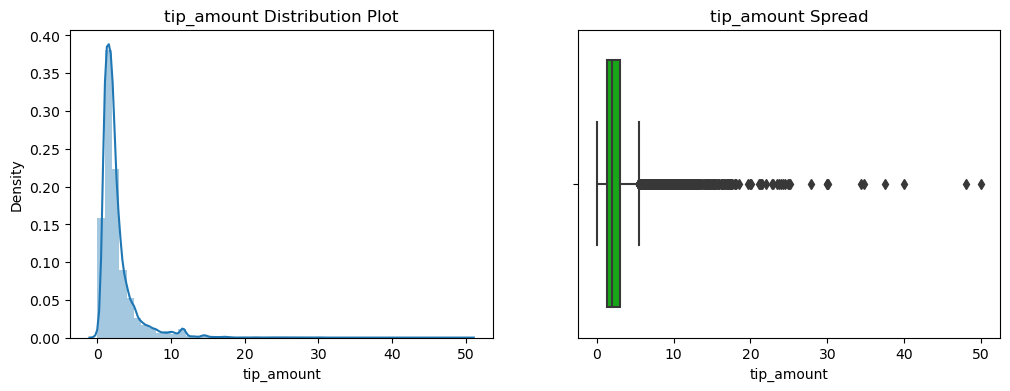

In [124]:

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('tip_amount Distribution Plot')
sns.distplot(df.tip_amount)

plt.subplot(1,2,2)
plt.title('tip_amount Spread')
sns.boxplot(x=df.tip_amount, palette='nipy_spectral')

<Axes: title={'center': 'tip_amount Spread'}, xlabel='tip_amount'>

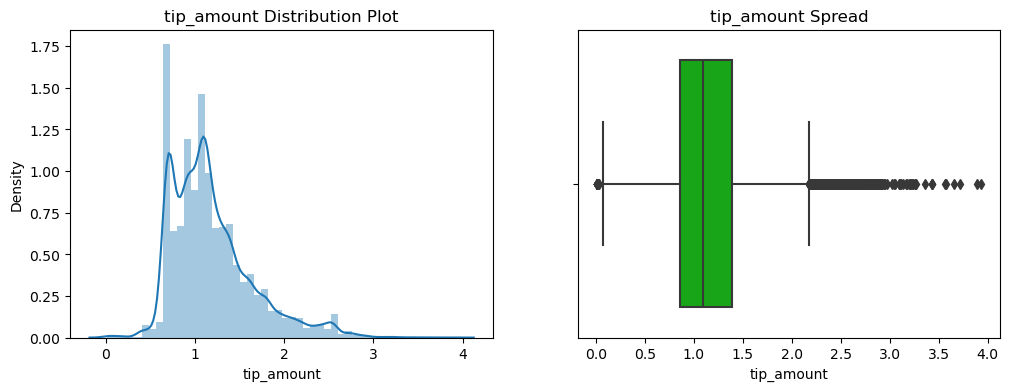

In [125]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('tip_amount Distribution Plot')
sns.distplot(np.log(df.tip_amount+1))

plt.subplot(1,2,2)
plt.title('tip_amount Spread')
sns.boxplot(x=np.log(df.tip_amount+1), palette='nipy_spectral')

## Preprocesamiento y normalizacion

In [126]:
# extraer del timestap minuto del dia, dia de la semana, mes del año

# "pickup_longitude","pickup_latitude","tip_amount"
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df["dia"] = df["tpep_pickup_datetime"].dt.dayofweek
df["mes"] = df["tpep_pickup_datetime"].dt.month
df["minuto"] = df["tpep_pickup_datetime"].dt.minute + (df["tpep_pickup_datetime"].dt.hour*60)

df.drop(columns=['tpep_pickup_datetime'],inplace=True)
df


,pickup_longitude,pickup_latitude,tip_amount,dia,mes,minuto
0,-73.993896,40.750111,3.25,3,1,1145
1,-74.001648,40.724243,2.00,5,1,1233
5,-73.874374,40.774048,6.70,5,1,1233
7,-74.002663,40.734142,1.66,5,1,1233
9,-73.985588,40.767948,1.55,5,1,1233
...,...,...,...,...,...,...
29993,-73.953957,40.766846,2.85,3,3,604
29994,-73.965851,40.762474,1.05,3,3,604
29995,-73.960396,40.770294,2.50,3,3,604
29996,-73.966164,40.794662,1.75,3,3,604


In [127]:
scaler = MinMaxScaler()

df["tip_amount"] = np.log(df["tip_amount"]) 

df[df.columns] = scaler.fit_transform(df)



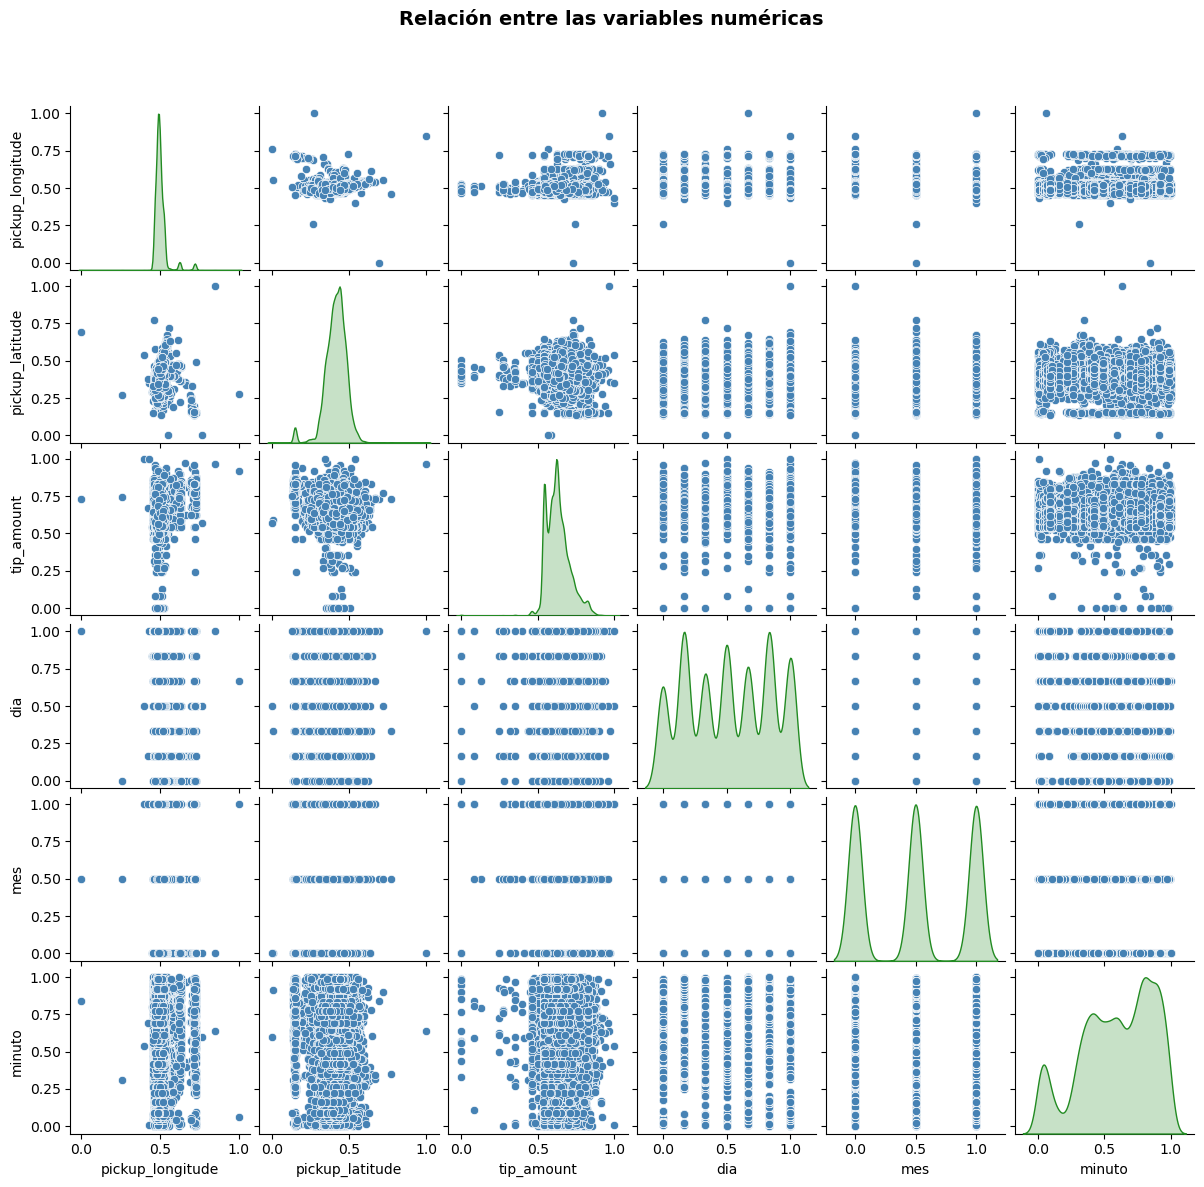

In [128]:
multiple_plot(1, df , df.columns , None, 'scatterplot', 'Relación entre las variables numéricas',30)

In [129]:
tip = df['tip_amount']
features = df[["pickup_longitude","pickup_latitude","dia","mes","minuto"]]
models = [
    AdaBoostRegressor(n_estimators=20, learning_rate=1, random_state=0),
    DecisionTreeRegressor(max_depth=5),
    GradientBoostingRegressor(learning_rate=0.1,n_estimators=20),
    RandomForestRegressor(max_depth = 5,random_state=0),
    SVR(kernel='sigmoid', C = 1000),
    SVR(kernel='linear' , C = 1000)
]

#Cross-validation: 10-folds
CV = 10

cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

a = 0
for model in models:
    model_name = model.__class__.__name__+str(a)
    a += 1
    accuracies = cross_val_score(model, features, tip, cv=CV,n_jobs = -1)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    print(model_name)
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

AdaBoostRegressor0
DecisionTreeRegressor1
GradientBoostingRegressor2
RandomForestRegressor3
SVR4
SVR5


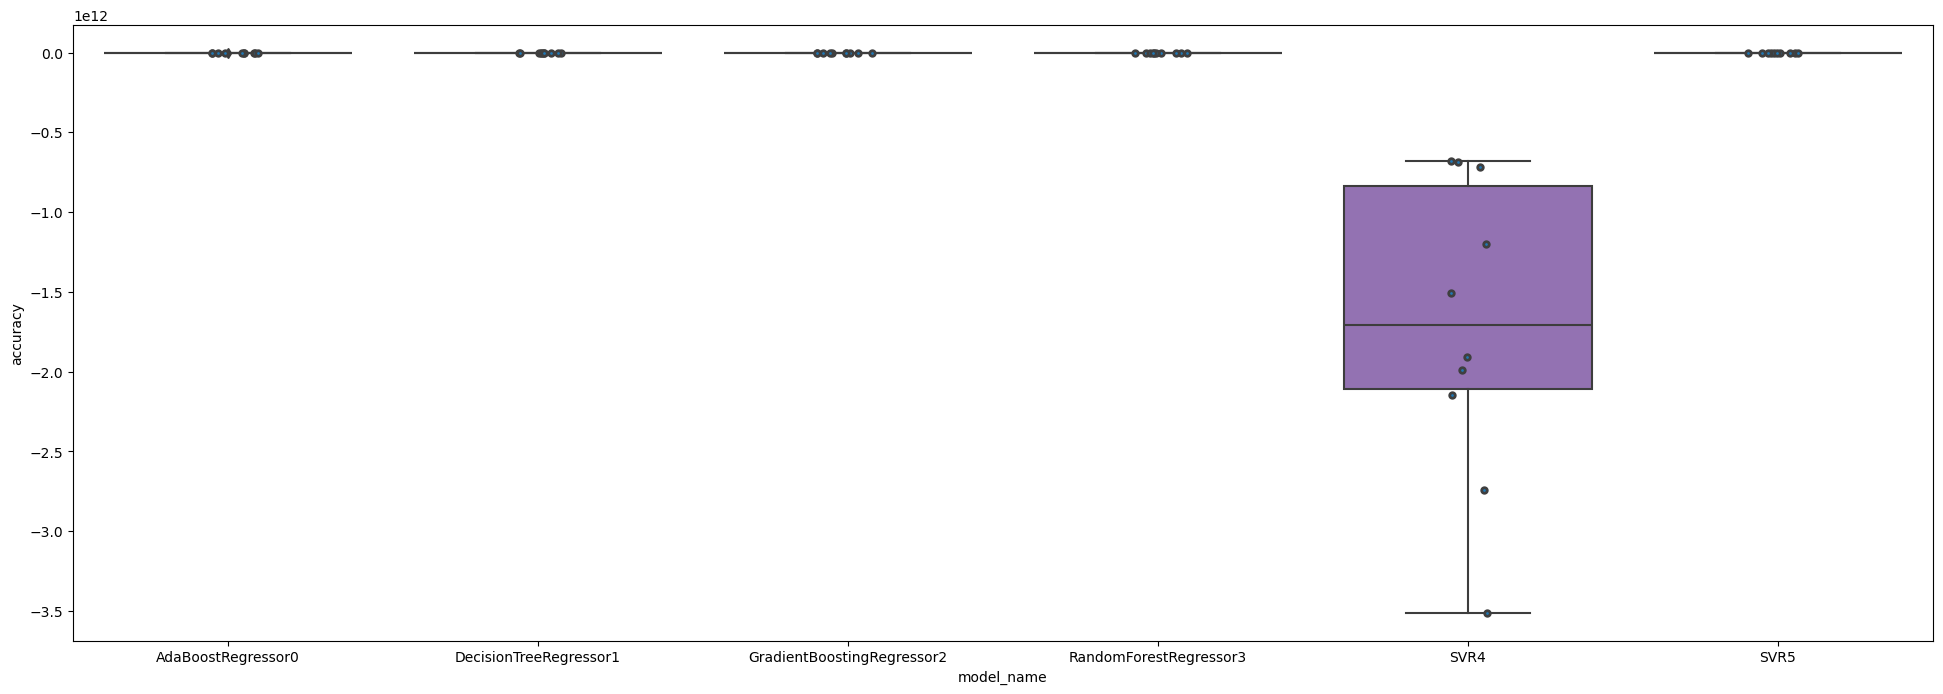

In [130]:
# Gráfica de accuracy de los modelos

figsize=(24,8)

plt.rcParams['figure.figsize'] = figsize

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=4, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [131]:
cv_df = cv_df[cv_df["model_name"]!="SVR4"]

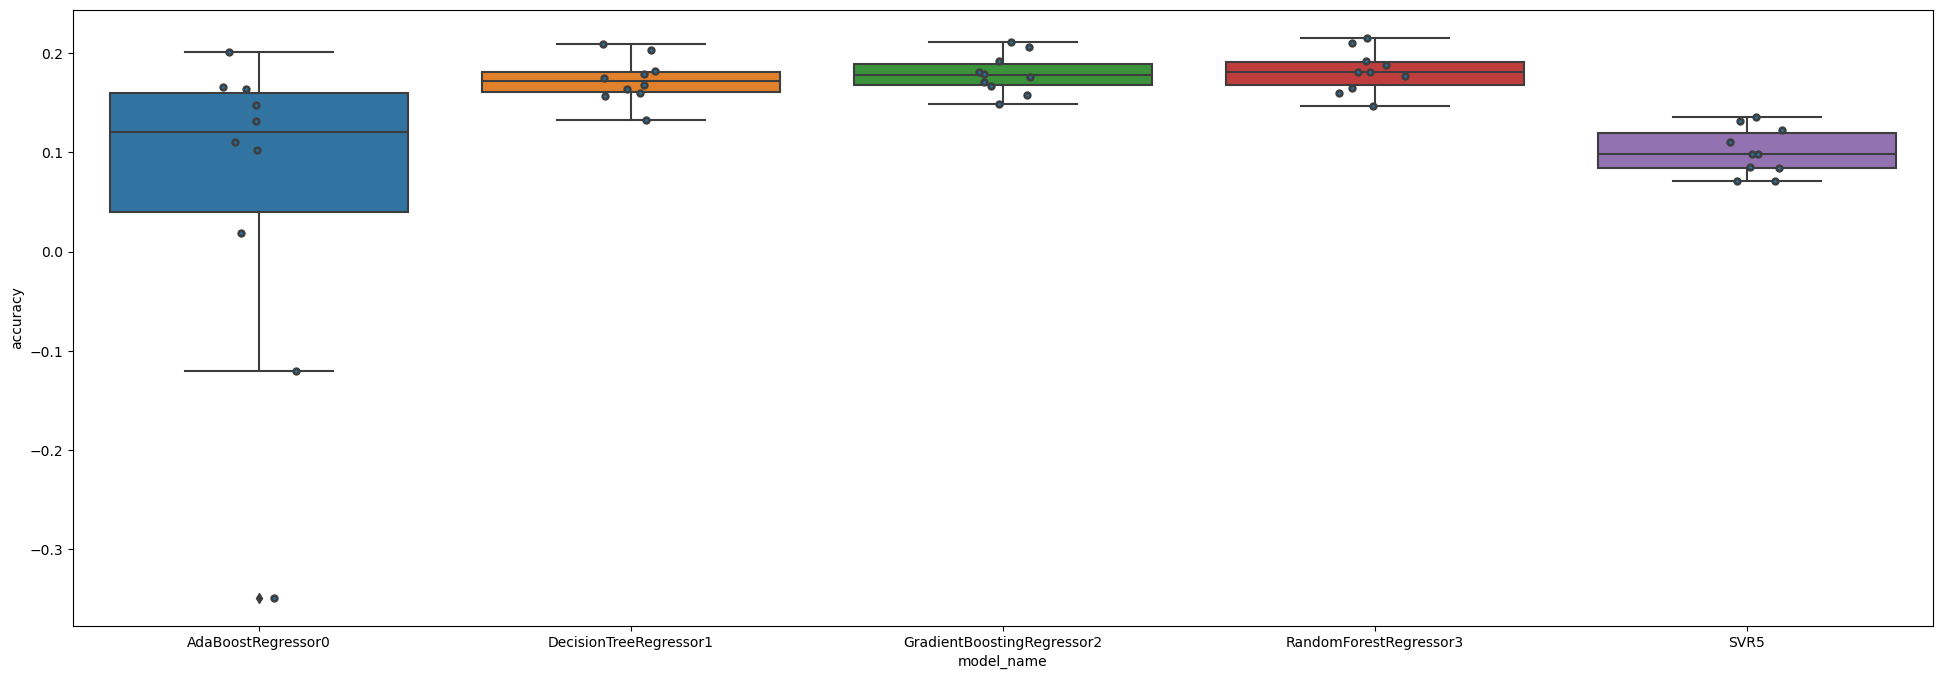

In [132]:
# Gráfica de accuracy de los modelos

figsize=(24,8)

plt.rcParams['figure.figsize'] = figsize

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=4, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

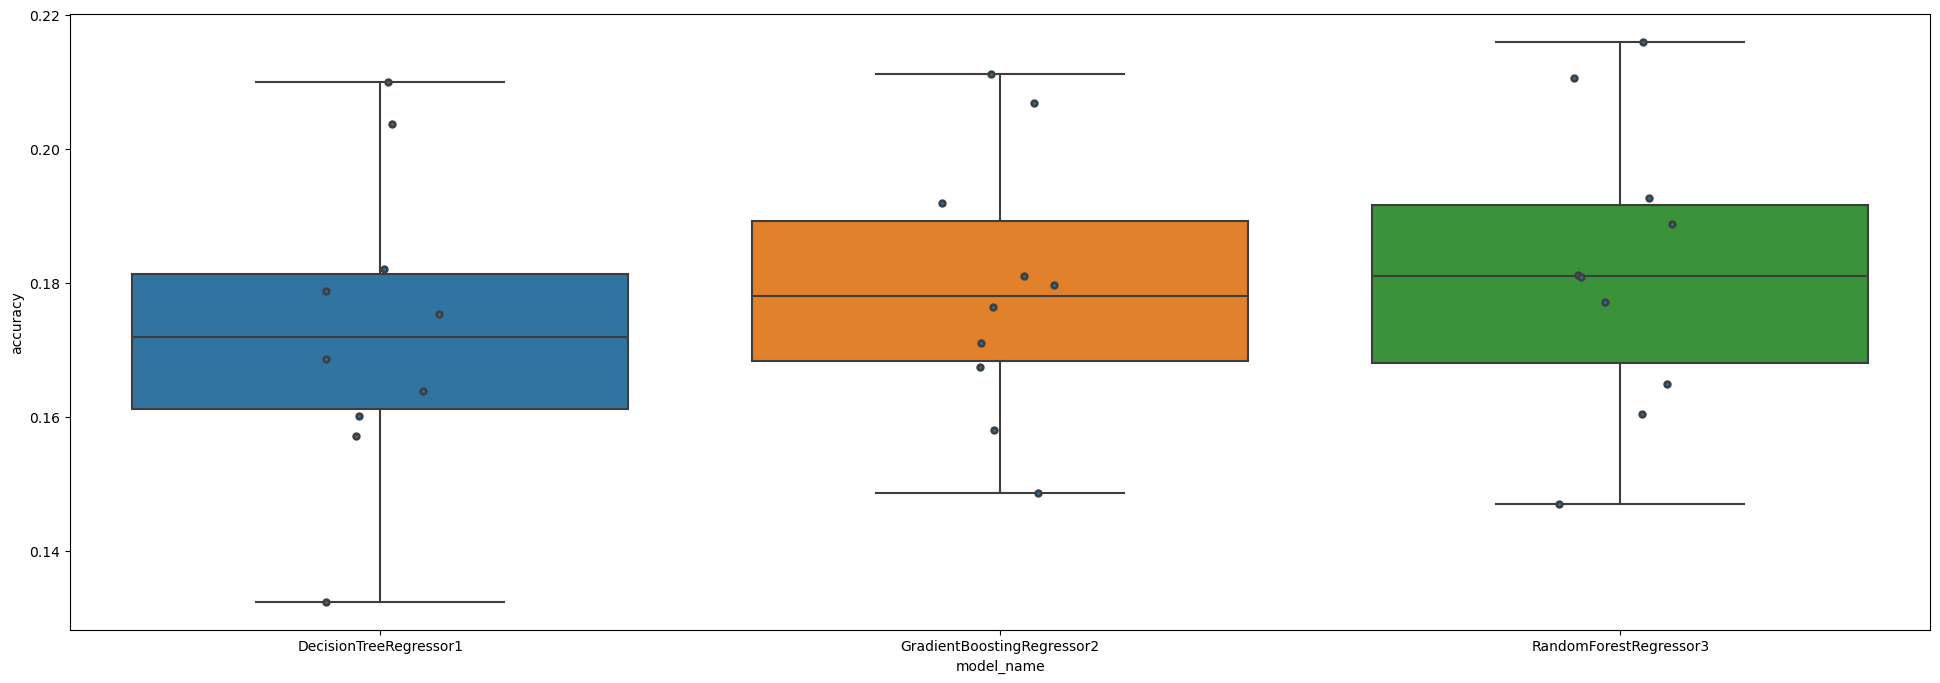

In [133]:
cv_df = cv_df[cv_df["model_name"]!="AdaBoostRegressor0"]
cv_df = cv_df[cv_df["model_name"]!="SVR5"]

# Gráfica de accuracy de los modelos

figsize=(24,8)

plt.rcParams['figure.figsize'] = figsize

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=4, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [134]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending=False)

model_name
RandomForestRegressor3        0.181923
GradientBoostingRegressor2    0.179196
DecisionTreeRegressor1        0.173184
Name: accuracy, dtype: float64

In [140]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150, 200, 250],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 20],
                 'criterion'   : ['friedman_mse', 'poisson']
                }
            )
CV = 7
scores = ['accuracy']
# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'accuracy_mean': [], 'accuracy_std': []}

for params in param_grid:
    
    model = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 69,
                ** params
             )
    
    resultados['params'].append(params)
    for i in scores:
        print(f'evaluando con el score {i} con los params {params}')
        score_ = cross_val_score(model, features, tip, cv=CV,n_jobs = -1)

        desv = score_.std()
        mean = score_.mean()
        resultados[i+"_mean"].append(mean)
        print(mean)
        resultados[i+"_std"].append(desv)



    # for fold_idx, accuracy in enumerate(accuracies):
    #     entries.append((model_name, fold_idx, accuracy))
    #     resultados['params'].append(params)
    #     resultados['accuracy'].append(accuracy)
    #     print(f"Modelo: {params} \u2713")

    # cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
        


# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
# resultados = resultados.sort_values('accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')

evaluando con el score accuracy con los params {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 5, 'n_estimators': 150}
0.14631530263961862
evaluando con el score accuracy con los params {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 5, 'n_estimators': 200}
0.1482165133664039
evaluando con el score accuracy con los params {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 5, 'n_estimators': 250}
0.1492247403364751
evaluando con el score accuracy con los params {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 7, 'n_estimators': 150}
0.14631530263961864
evaluando con el score accuracy con los params {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 7, 'n_estimators': 200}
0.14821651336640387
evaluando con el score accuracy con los params {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 7, 'n_estimators': 250}
0.14922474033647498
evaluando con el score accuracy con los params {'criterion': 'frie

In [146]:
resultados.groupby(["criterion",	"max_depth",	"max_features",	"n_estimators"]).accuracy_mean.mean().sort_values(ascending=False)

criterion     max_depth  max_features  n_estimators
poisson       3.0        9             250             0.177464
                         5             250             0.177464
                         7             250             0.177464
                                       200             0.177464
                         9             200             0.177464
                         5             200             0.177464
                         9             150             0.177381
                         7             150             0.177381
                         5             150             0.177381
friedman_mse  3.0        5             250             0.177247
                         7             250             0.177247
                         9             250             0.177247
                         5             200             0.177242
                         7             200             0.177242
                         9             200          

In [148]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [400, 700, 1500],
                 'max_features': [5],
                 'max_depth'   : [6,7],
                 'criterion'   : ['poisson']
                }
            )
CV = 7
scores = ['accuracy']
# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'accuracy_mean': [], 'accuracy_std': []}

for params in param_grid:
    
    model = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 69,
                ** params
             )
    
    resultados['params'].append(params)
    for i in scores:
        print(f'evaluando con el score {i} con los params {params}')
        score_ = cross_val_score(model, features, tip, cv=CV,n_jobs = -1)

        desv = score_.std()
        mean = score_.mean()
        resultados[i+"_mean"].append(mean)
        print(mean)
        resultados[i+"_std"].append(desv)



    # for fold_idx, accuracy in enumerate(accuracies):
    #     entries.append((model_name, fold_idx, accuracy))
    #     resultados['params'].append(params)
    #     resultados['accuracy'].append(accuracy)
    #     print(f"Modelo: {params} \u2713")

    # cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
        


# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
# resultados = resultados.sort_values('accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')

evaluando con el score accuracy con los params {'criterion': 'poisson', 'max_depth': 6, 'max_features': 5, 'n_estimators': 400}
0.18513868475227008
evaluando con el score accuracy con los params {'criterion': 'poisson', 'max_depth': 6, 'max_features': 5, 'n_estimators': 700}
0.18516079340362898
evaluando con el score accuracy con los params {'criterion': 'poisson', 'max_depth': 6, 'max_features': 5, 'n_estimators': 1500}
0.18515002881021916
evaluando con el score accuracy con los params {'criterion': 'poisson', 'max_depth': 7, 'max_features': 5, 'n_estimators': 400}
0.18721508596170583
evaluando con el score accuracy con los params {'criterion': 'poisson', 'max_depth': 7, 'max_features': 5, 'n_estimators': 700}
0.18725438951702092
evaluando con el score accuracy con los params {'criterion': 'poisson', 'max_depth': 7, 'max_features': 5, 'n_estimators': 1500}
0.1872594791694011
